# **STUDENTS SOCIAL MEDIA ADDICTION**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Students Social Media Addiction.csv")

In [ ]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Usage_Status,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Sleep_Status,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Poor,Instagram,Yes,6.5,Average,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Average,Twitter,No,7.5,Good,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,Poor,TikTok,Yes,5.0,Poor,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,Average,YouTube,No,7.0,Good,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Poor,Facebook,Yes,6.0,Average,6,In Relationship,2,7


In [ ]:
df.shape

(705, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Usage_Status                  705 non-null    object 
 7   Most_Used_Platform            705 non-null    object 
 8   Affects_Academic_Performance  705 non-null    object 
 9   Sleep_Hours_Per_Night         705 non-null    float64
 10  Sleep_Status                  705 non-null    object 
 11  Mental_Health_Score           705 non-null    int64  
 12  Relationship_Status           705 non-null    object 
 13  Confl

CHECKING MISSING AND DUPLICATED VALUES

In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Usage_Status,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0


In [ ]:
print(df.duplicated().sum())

0


OUTLIERS HANDLING

<Axes: ylabel='Sleep_Hours_Per_Night'>

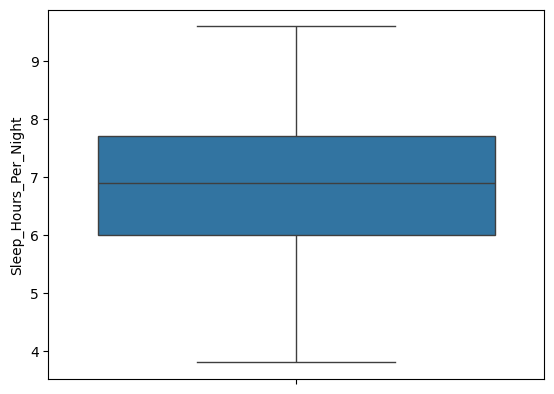

In [ ]:
sns.boxplot(df.Sleep_Hours_Per_Night)

In [ ]:
Q1 = df['Avg_Daily_Usage_Hours'].quantile(0.25)
Q3 = df['Avg_Daily_Usage_Hours'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
df['Avg_Daily_Usage_Hours'] = df['Avg_Daily_Usage_Hours'].clip(lower, upper)

<Axes: ylabel='Avg_Daily_Usage_Hours'>

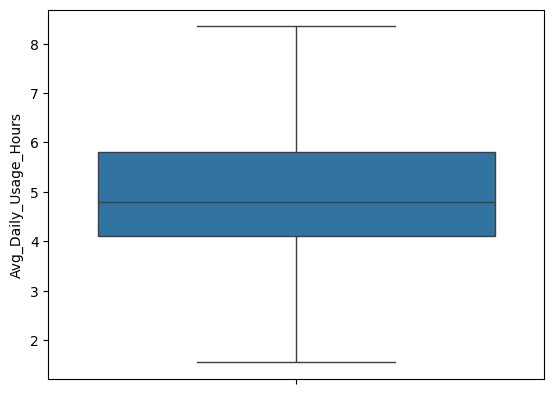

In [ ]:
sns.boxplot(df.Avg_Daily_Usage_Hours)

In [ ]:
df['Usage_Status']=df['Usage_Status'].astype('category')
df['Sleep_Status']=df['Sleep_Status'].astype('category')

DESCRIPTIVE STATISTICS

In [ ]:
print(df['Avg_Daily_Usage_Hours'].mean())
print(df['Mental_Health_Score'].mean())
print(df['Addicted_Score'].mean())

4.918510638297872
6.226950354609929
6.436879432624114


In [ ]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918511,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.256413,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.550000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.350000,9.600000,9.000000,5.000000,9.000000


In [ ]:
#df['Academic_Level'].value_counts()
import plotly.express as px
level_counts = df['Academic_Level'].value_counts().reset_index()
level_counts.columns = ['Academic_Level', 'count']
fig = px.pie(level_counts, values='count', names='Academic_Level', title='Academic Level Distribution',width=900, height=600)
fig.update_layout(
    margin=dict(t=40, b=40, l=40, r=40),# Reduce margins
    title_x=0.5)# Center the title
fig.update_traces(marker=dict(line=dict(width=2)),
                  textposition='inside', textinfo='label')
fig.show()

In [ ]:
df['Affects_Academic_Performance'].value_counts()

,count
Affects_Academic_Performance,
Yes,453
No,252


In [ ]:
df['Country'].value_counts().head(5)  #top 5 countries

,count
Country,
India,53
USA,40
Canada,34
France,27
Mexico,27


In [ ]:
df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean()

,Avg_Daily_Usage_Hours
Academic_Level,
Graduate,4.777077
High School,5.544444
Undergraduate,5.000850


VISUALIZATION

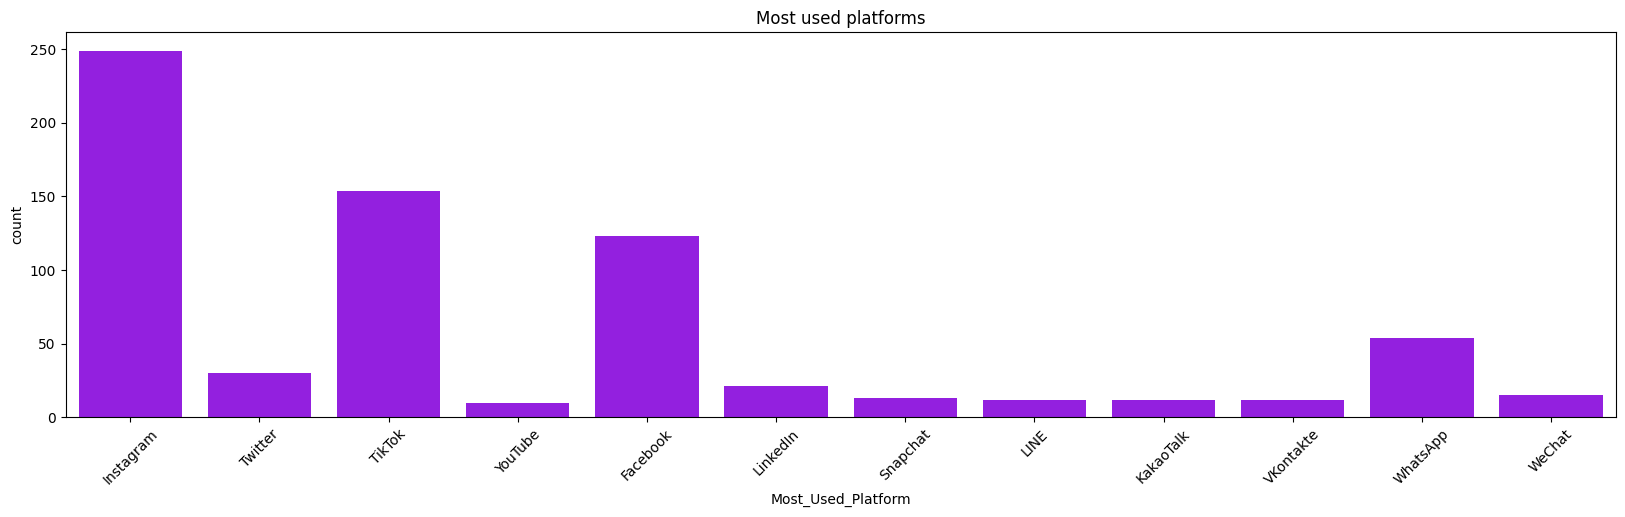

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Most_Used_Platform',data=df,color="#9900ff")
plt.title("Most used platforms")
plt.xticks(rotation=45)
plt.show()

In [ ]:
mat=df[['Age','Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score']]

In [ ]:
corr_matrix = mat.corr()

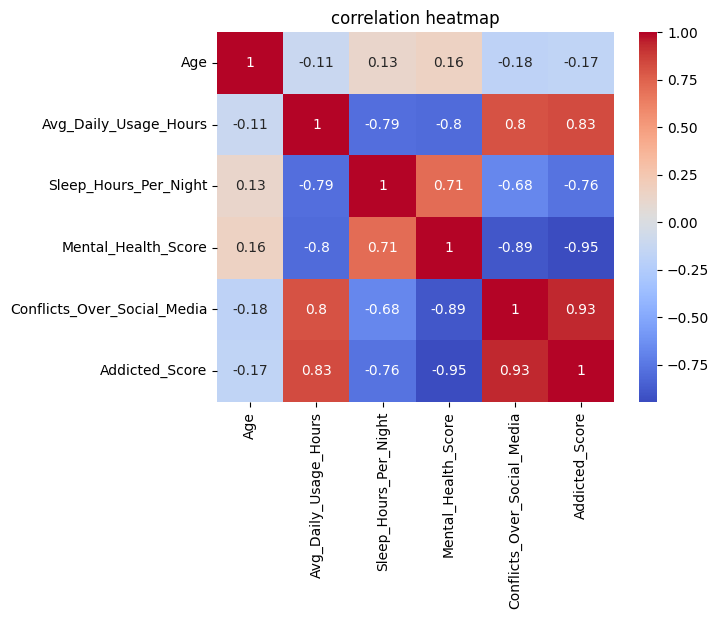

In [ ]:

sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

In [ ]:
df.groupby('Academic_Level')['Addicted_Score'].mean()

,Addicted_Score
Academic_Level,
Graduate,6.243077
High School,8.037037
Undergraduate,6.492918


**Who are the most at-risk groups (high addiction score, low mental health, poor sleep)**

In [ ]:
df.groupby('Academic_Level', as_index=True).agg({
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Sleep_Hours_Per_Night' : 'mean'
})

,Addicted_Score,Mental_Health_Score,Sleep_Hours_Per_Night
Academic_Level,,,
Graduate,6.243077,6.372308,7.030154
High School,8.037037,5.111111,5.455556
Undergraduate,6.492918,6.178470,6.828612


**OBSERVATION:**
HIGH SCHOOL STUDENTS ARE AT MOST RISK

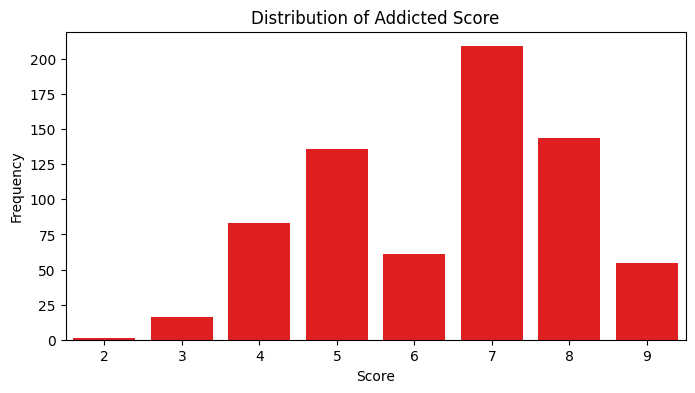

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Addicted_Score"],data=df,color = "red")
plt.title('Distribution of Addicted Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Is there a pattern between average daily usage hours and reported impact on academic performance?

In [ ]:
df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean()

,Avg_Daily_Usage_Hours
Affects_Academic_Performance,
No,3.804563
Yes,5.538190


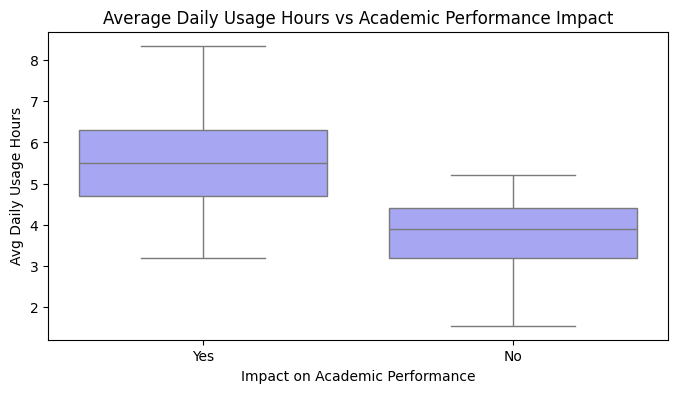

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Affects_Academic_Performance", y="Avg_Daily_Usage_Hours",color="#9999ff")
plt.title("Average Daily Usage Hours vs Academic Performance Impact")
plt.xlabel("Impact on Academic Performance")
plt.ylabel("Avg Daily Usage Hours")
plt.show()


Identify how addiction scores vary across genders.

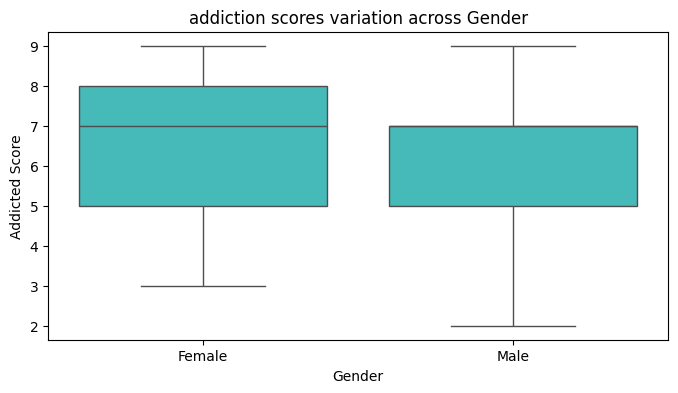

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Gender", y="Addicted_Score",color="#33cccc")
plt.title("addiction scores variation across Gender")
plt.xlabel("Gender")
plt.ylabel("Addicted Score")
plt.show()

Which platforms are most associated with negative academic performance?

In [ ]:
academic_affectness=df[df['Affects_Academic_Performance']=='Yes']
#academic_affectness.head()
#academic_affectness.groupby('Affects_Academic_Performance')['Most_Used_Platform'].value_counts()

app_counts =academic_affectness['Most_Used_Platform'].value_counts().reset_index()
app_counts.columns = ['Most_Used_Platform', 'count']
fig = px.pie(app_counts, values='count', names='Most_Used_Platform', title=' Platforms associated with negative academic performance',width=900, height=600)
fig.update_layout(
    margin=dict(t=40, b=40, l=40, r=40),# Reduce margins
    title_x=0.5)# Center the title
fig.update_traces(marker=dict(line=dict(width=2)),
                  textposition='inside', textinfo='label')
fig.show()

Compare students with good vs poor sleep status—how do their addiction scores and mental health scores differ?

In [ ]:
df.groupby('Sleep_Status', as_index=True).agg({
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean'
})

/tmp/ipython-input-1910361894.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Addicted_Score,Mental_Health_Score
Sleep_Status,,
Average,7.223958,5.645833
Good,5.236994,7.017341
Poor,8.017964,5.257485


In [ ]:
df.groupby("Relationship_Status")["Conflicts_Over_Social_Media"].mean()

,Conflicts_Over_Social_Media
Relationship_Status,
Complicated,3.031250
In Relationship,2.761246
Single,2.901042


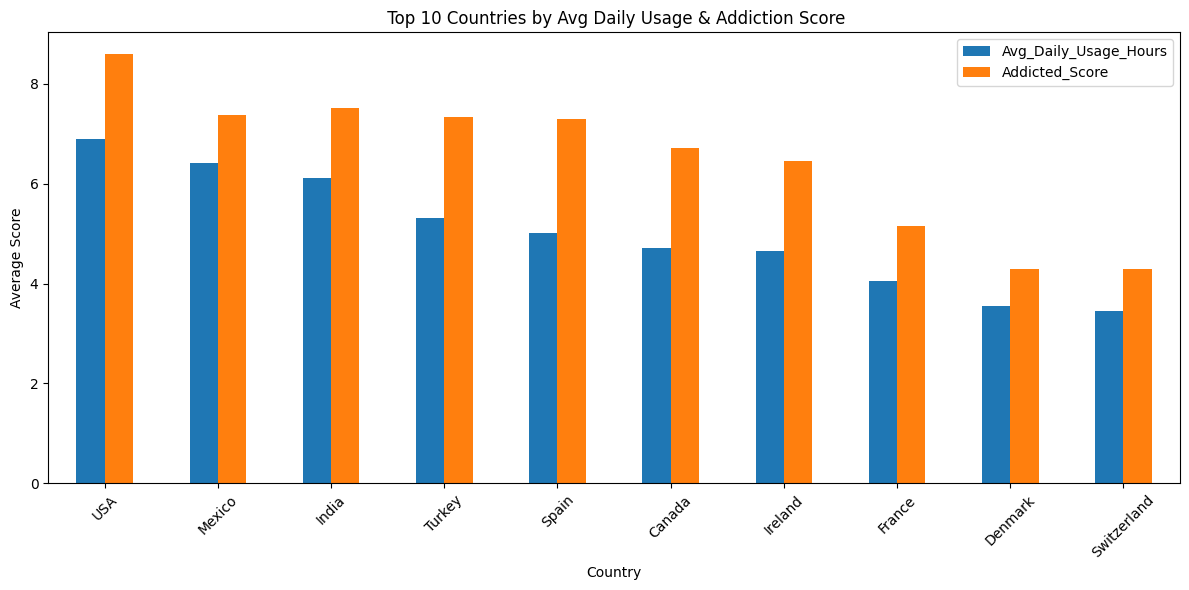

In [ ]:
#df_grouped =df.groupby("Country")["Addicted_Score"].sum()
#df_grouped = df_grouped.sort_values(ascending=False)
#df_grouped.head()

# Plot average usage and addiction score by country
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]

country_avg = country_data.groupby('Country')[['Avg_Daily_Usage_Hours', 'Addicted_Score']].mean().sort_values(
    'Avg_Daily_Usage_Hours', ascending=False)

country_avg.plot(kind='bar', figsize=(12, 6))
plt.title(" Top 10 Countries by Avg Daily Usage & Addiction Score")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['Usage_Status'].value_counts()

,count
Usage_Status,
Poor,536
Average,167
Good,2


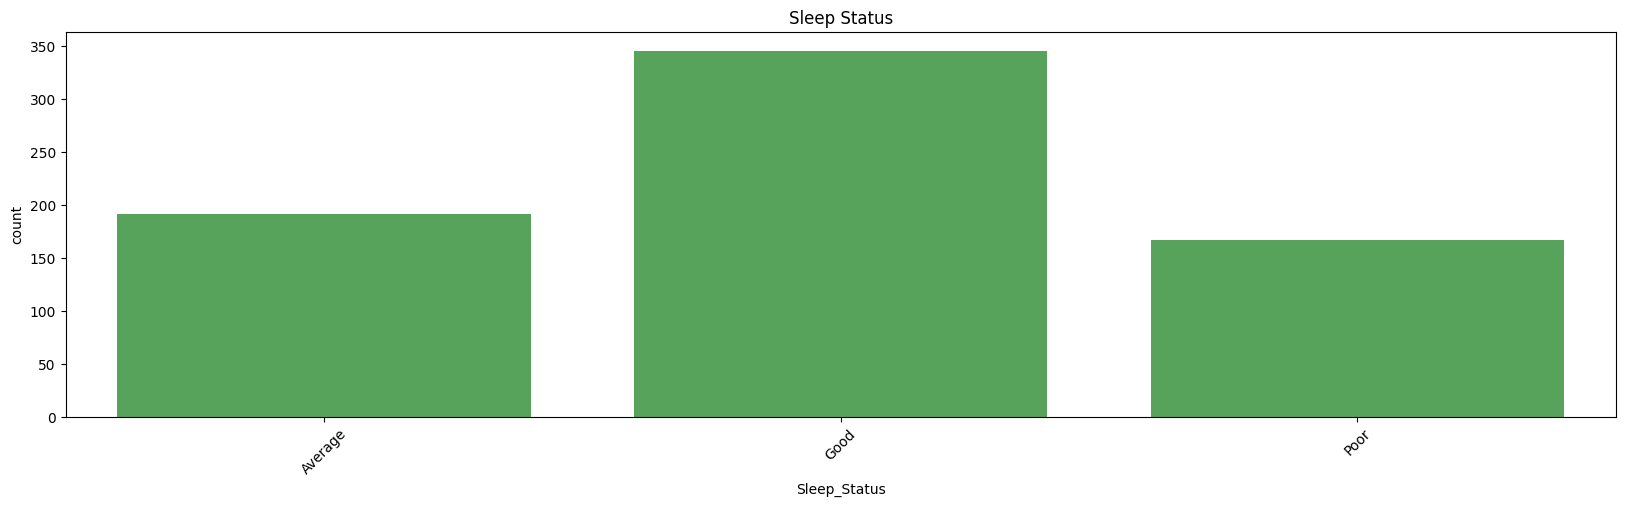

In [ ]:
#df['Sleep_Status'].value_counts()
plt.figure(figsize=(20, 5))
sns.countplot(x='Sleep_Status',data=df,color = "#4CAF50")
plt.title("Sleep Status")
plt.xticks(rotation=45)
plt.show()

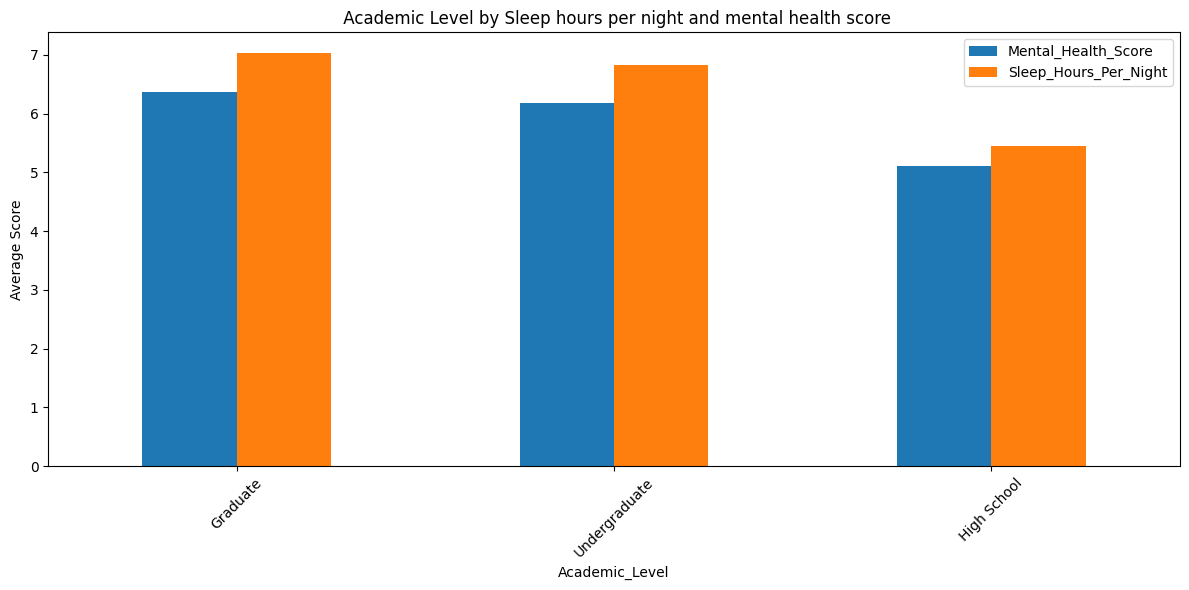

In [ ]:
level_avg =df.groupby('Academic_Level')[['Mental_Health_Score', 'Sleep_Hours_Per_Night']].mean().sort_values(
    'Sleep_Hours_Per_Night', ascending=False)

level_avg.plot(kind='bar', figsize=(12, 6))
plt.title(" Academic Level by Sleep hours per night and mental health score")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


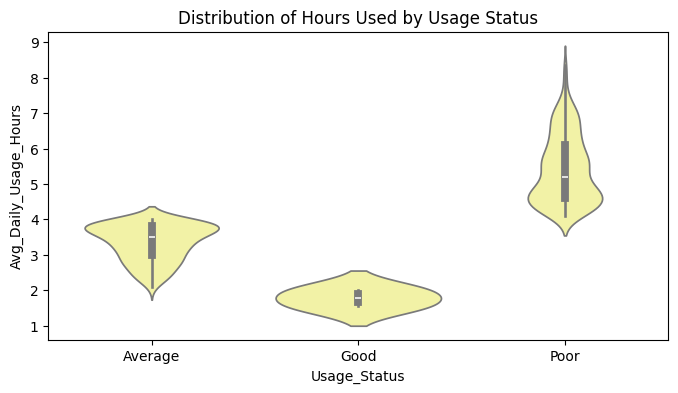

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Usage_Status', y='Avg_Daily_Usage_Hours', data=df,color="#ffff99")

plt.title('Distribution of Hours Used by Usage Status')
plt.show()

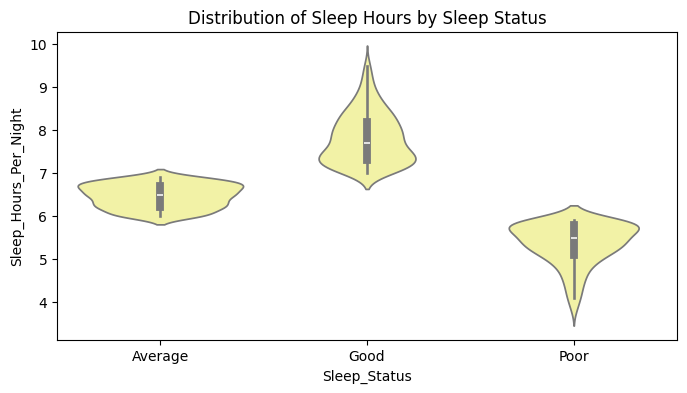

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Sleep_Status', y='Sleep_Hours_Per_Night', data=df,color="#ffff99")

plt.title('Distribution of Sleep Hours by Sleep Status')
plt.show()

In [ ]:
df.groupby('Age', as_index=True).agg({
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Avg_Daily_Usage_Hours' : 'mean'
})

,Addicted_Score,Mental_Health_Score,Avg_Daily_Usage_Hours
Age,,,
18,7.785714,5.214286,5.385714
19,6.650307,6.055215,5.119325
20,6.478788,6.218182,4.930000
21,6.589744,6.160256,4.950641
22,6.095238,6.476190,4.676190
23,5.676471,6.647059,4.510294
24,6.115385,6.346154,5.046154


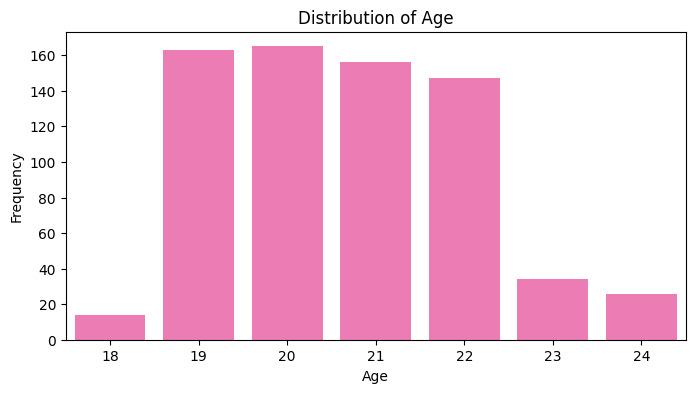

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Age"],data=df,color ="hotpink")
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**PREDICTIVE MODELING**

In [ ]:
df1=df.copy()

In [ ]:
# Define the order
from sklearn.preprocessing import OrdinalEncoder

# Define the order manually
order = [['Poor', 'Average', 'Good']]

oe = OrdinalEncoder(categories=order)
df1['Usage_Status'] = oe.fit_transform(df1[['Usage_Status']])
df1['Sleep_Status'] = oe.fit_transform(df1[['Sleep_Status']])

In [ ]:
label_en=['Academic_Level','Affects_Academic_Performance','Gender','Most_Used_Platform','Relationship_Status']
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in label_en:
  df1[col]=labelencoder.fit_transform(df1[col])

In [ ]:
df1.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Usage_Status,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Sleep_Status,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,2,Bangladesh,5.2,0.0,1,1,6.5,1.0,6,1,3,8
1,2,22,1,0,India,2.1,1.0,7,0,7.5,2.0,8,2,0,3
2,3,20,0,2,USA,6.0,0.0,6,1,5.0,0.0,5,0,4,9
3,4,18,1,1,UK,3.0,1.0,11,0,7.0,2.0,7,2,1,4
4,5,21,1,0,Canada,4.5,0.0,0,1,6.0,1.0,6,1,2,7


In [ ]:
x=df1.drop(['Addicted_Score','Country'],axis=1)
y=df1['Addicted_Score']

In [ ]:
x.shape

(705, 13)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
bestfeatures=SelectKBest(mutual_info_regression,k=5)
bestfeatures.fit(x_train,y_train)
x_train_selected=x_train[x_train.columns[bestfeatures.get_support()]]

In [ ]:
x_train_selected.columns

Index(['Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score',
       'Conflicts_Over_Social_Media'],
      dtype='object')

In [ ]:
x_test_selected=x_test[x_test.columns[bestfeatures.get_support()]]
x_train_selected.shape

(564, 5)

**RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_leaf=50,n_jobs=4,random_state=42)
rfr.fit(x_train_selected,y_train)
y_pred=rfr.predict(x_test_selected)

Evaluation

In [ ]:
#R-Squared:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9256680022877786

In [ ]:
#MAE and MSE
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mean absolute error:",mae)
print("mean squared error:",mse)

mean absolute error: 0.29674627979701346
mean squared error: 0.18691239020317746


**DecisionTree**

In [ ]:
from sklearn import tree
dt=tree.DecisionTreeRegressor(random_state = 42)
dt.fit(x_train_selected,y_train)
y_pred=dt.predict(x_test_selected)

Evaluation

In [ ]:
#R-Squared:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9460980423534432

In [ ]:
#MAE and MSE
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mean absolute error:",mae)
print("mean squared error:",mse)

mean absolute error: 0.13711583924349882
mean squared error: 0.1355397951142632


In [ ]:
df['Affects_Academic_Performance'].head()

,Affects_Academic_Performance
0,Yes
1,No
2,Yes
3,No
4,Yes


In [ ]:
df1['Affects_Academic_Performance'].head()

,Affects_Academic_Performance
0,1
1,0
2,1
3,0
4,1


In [ ]:
df['Most_Used_Platform'].unique()

array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)

In [ ]:
df1['Most_Used_Platform'].unique()

array([ 1,  7,  6, 11,  0,  4,  5,  3,  2,  8, 10,  9])

In [ ]:
Affects_Academic_Performance={'Yes':1,'No':0}

In [ ]:
#for categorical columns
inputs = []

for col in x_train_selected.columns:
    if col=='Affects_Academic_Performance':
      print(Affects_Academic_Performance)
      val = input(f"Enter {col} (type exactly as shown above): ")
      inputs.append(float(val))
    else:
        # numeric input
      val = input(f"Enter {col}: ")
      inputs.append(float(val))

# Convert to DataFrame for model
input_df = pd.DataFrame([inputs], columns=x_train_selected.columns)

# Predict using your model
prediction = dt.predict(input_df)
print("Prediction of Addicted Score:", prediction)

Enter Avg_Daily_Usage_Hours: 2
{'Yes': 1, 'No': 0}
Enter Affects_Academic_Performance (type exactly as shown above): 0
Enter Sleep_Hours_Per_Night: 8
Enter Mental_Health_Score: 8
Enter Conflicts_Over_Social_Media: 2
Prediction of Addicted Score: [4.]
